# Santander Customer Transaction Prediction

 In this challenge we need to identify which customer will make specific transaction in the future, irrespective of the amount of the money transacted.

In [3]:
# Loading Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
# import eli5

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, roc_curve, auc

random_state = 42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

## importing the train dataset

In [4]:
df_train = pd.read_csv(r"Z:\Edu-versity\Santander Customer Transaction Prediction Dataset\train.csv")
pd.options.display.max_columns = None

In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
df_train.shape

(200000, 202)

### describe the data

In [7]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

### Target Class Count

In [9]:
# target class count
target_class = df_train['target'].value_counts()
print('COUNT OF THE TARGET CLASS :\n', target_class)

# percentage of the target class count
per_target_class = df_train['target'].value_counts()/len(df_train)*100
print('PERCENTAGE OF THE TARGET CLASS COUNT :\n',per_target_class)

COUNT OF THE TARGET CLASS :
 target
0    179902
1     20098
Name: count, dtype: int64
PERCENTAGE OF THE TARGET CLASS COUNT :
 target
0    89.951
1    10.049
Name: count, dtype: float64


Observation:

we are having a unbalanced data, where 90% of the data isno. of customers who will make transaction & 10% of the data are those who will nit make a transaction.

from violin plots, it seems that there is no realation between the target and index of the dataframe, it is more dominated by zero compared to ones.

from jitter plots with violin plots, we can observe that target looks uniformly distributed over indexes of the dataframe.

## Distribution of the train attributes

In [12]:
%%time

# Distribution of the train attributes

def plot_train_attribute_distribution(t0, t1, label1, label2, train_attributes):
    i = 0
    sns.set_style('darkgrid')

    fig = plt.figure()
    ax = plt.subplots(10, 10, figsize=(22,18))

    for attribute in train_attributes:
        i += 1
        plt.subplot(10, 10, i)
        sns.distplot(t0[attribute], hist = False, label = label1)
        sns.distplot(t1[attribute], hist = False, label = label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xticks.major.size" : 8, "yticks.major.size" : 8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


### observing first 100 train attributes

<Figure size 640x480 with 0 Axes>

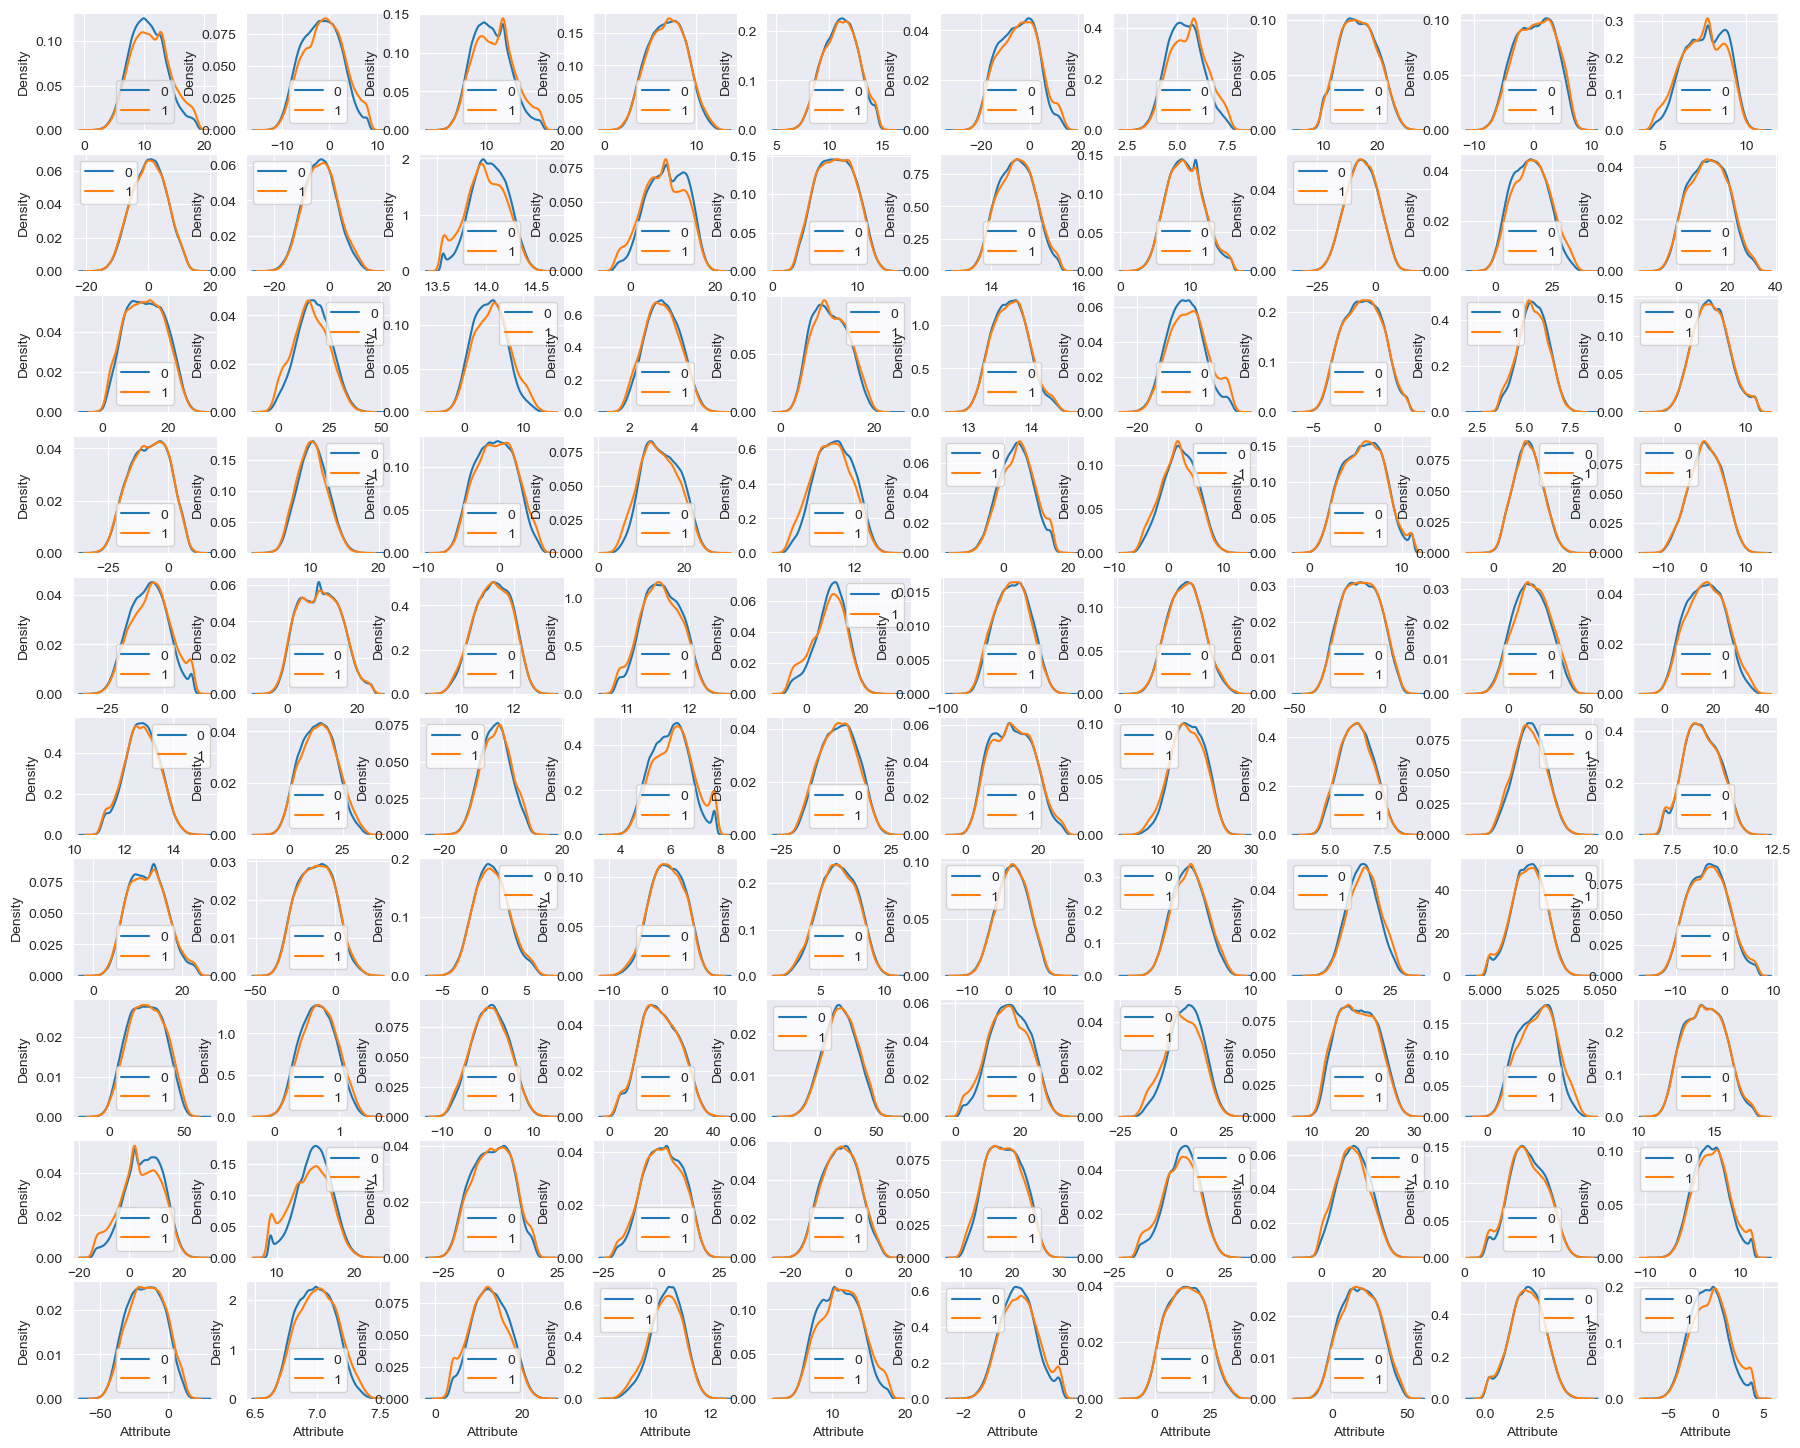

CPU times: total: 2min 25s
Wall time: 2min 26s


In [25]:
%%time
# corresponding to negative class
t0 = df_train[df_train.target.values == 0]


# corresponding to negative class
t1 = df_train[df_train.target.values == 1]

# train attributes from 2 to 102
train_attributes = df_train.columns.values[2:102]

# plot distribution of the train attribute
plot_train_attribute_distribution(t0, t1, '0', '1', train_attributes)

### plotting next 100 train attributes

<Figure size 640x480 with 0 Axes>

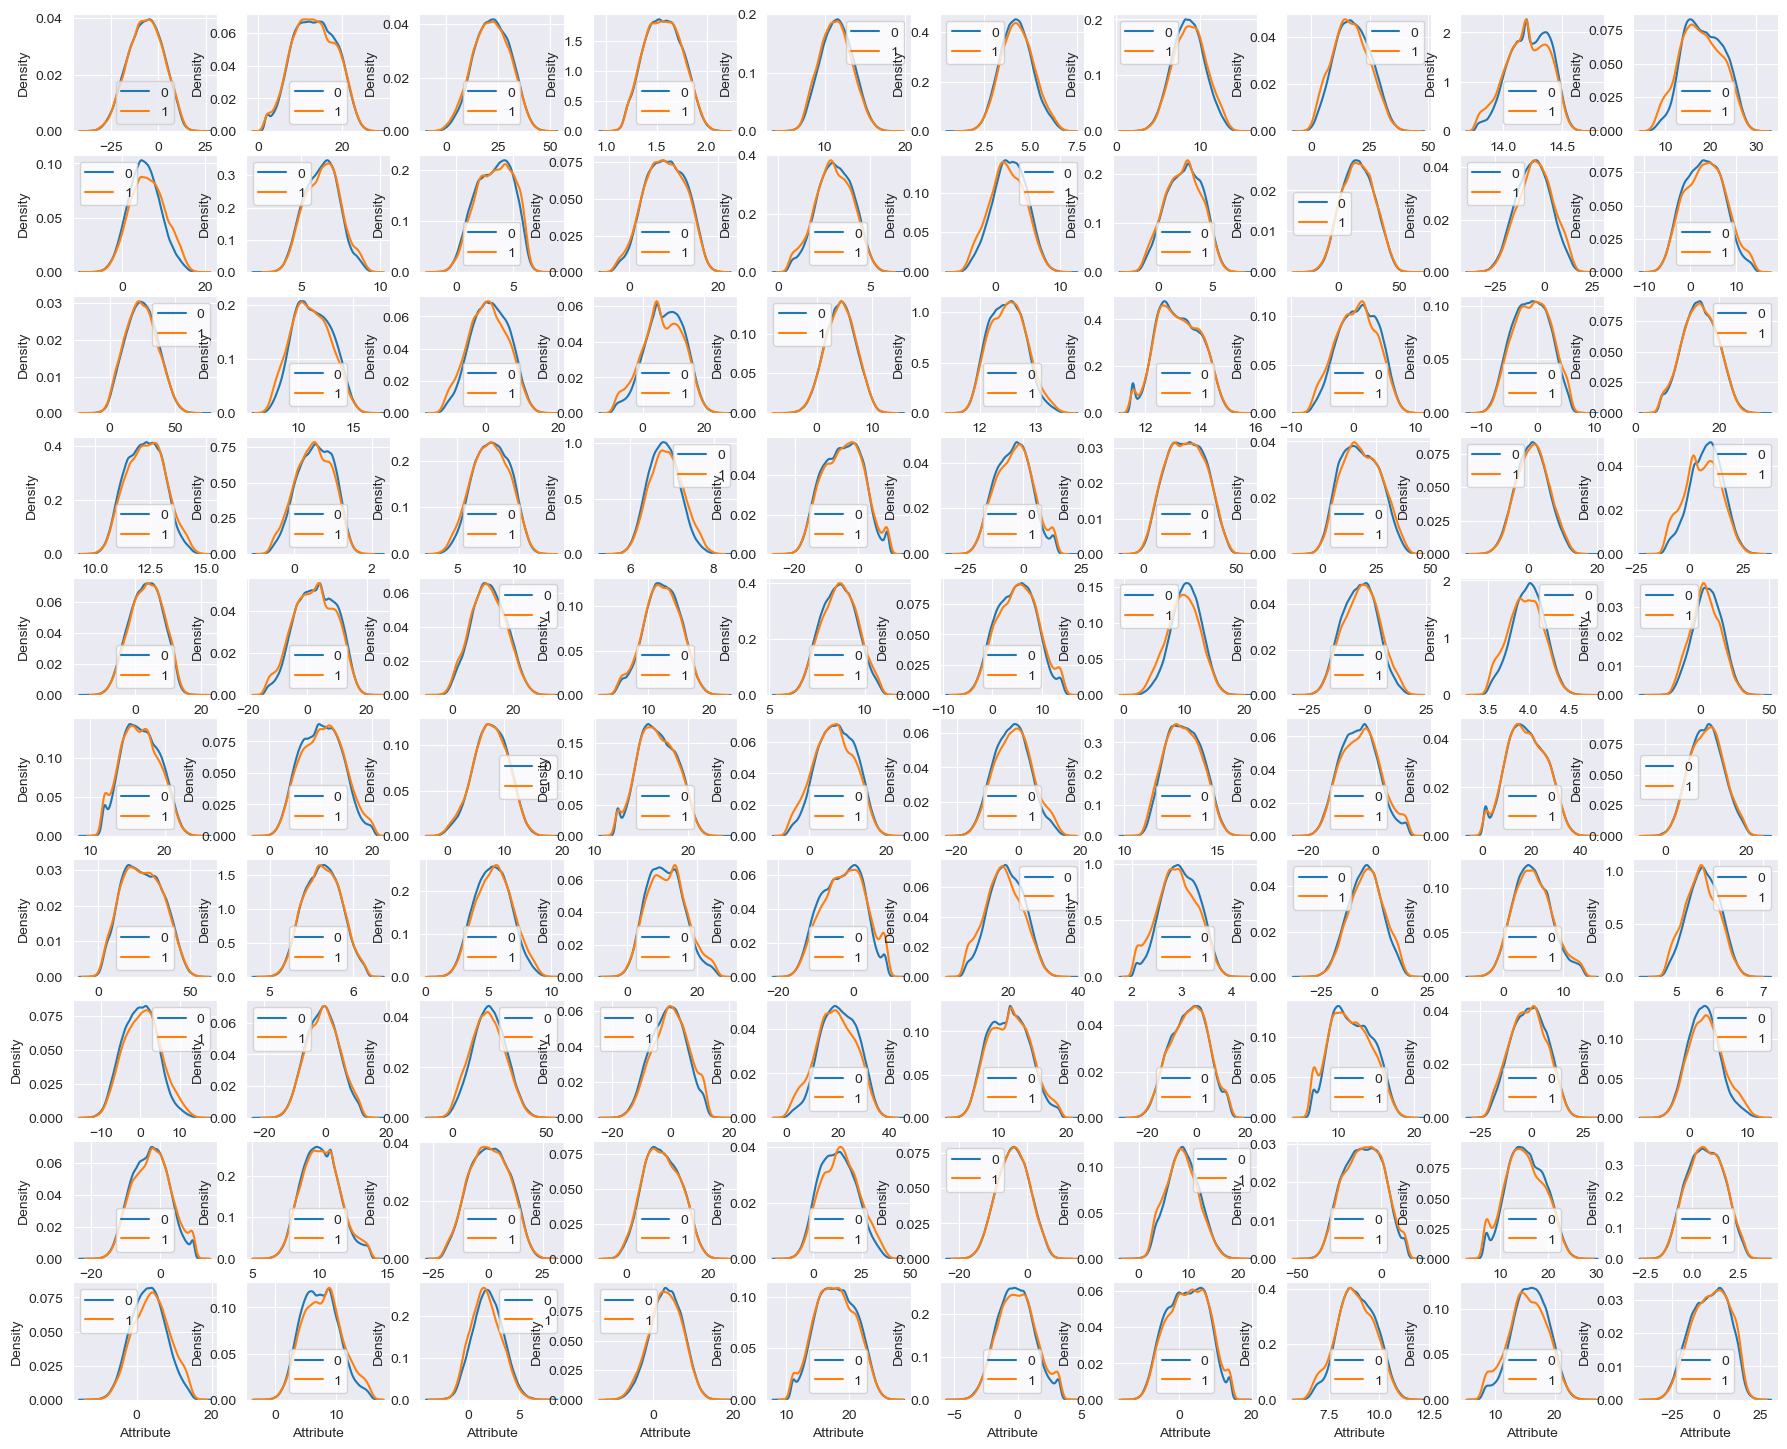

In [88]:
# train attributes from 2 to 102
train_attributes = df_train.columns.values[102:202]

# plot distribution of the train attribute
plot_train_attribute_distribution(t0, t1, '0', '1', train_attributes)

Observation : We can observe that there is a considerable number of features which have significantly different distribution. for eg var_0, var_1, var_6, var_109 etc.

There are also connsiderable number of features which have same distribution. for eg var_101, var_4, var_5 etc

## importing the test dataset

In [34]:
df_test = pd.read_csv(r"Z:\Edu-versity\Santander Customer Transaction Prediction Dataset\test.csv")

In [36]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [38]:
df_test.shape

(200000, 201)

In [40]:
%%time

# Distribution of test attributes

def plot_test_attribute_distribution(test_attributes):
    i = 0
    sns.set_style('darkgrid')

    fig = plt.figure()
    ax = plt.subplots(10, 10, figsize=(22,18))

    for attribute in test_attributes:
        i += 1
        plt.subplot(10, 10, i)
        sns.distplot(df_test[attribute], hist = False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xticks.major.size" : 8, "yticks.major.size" : 8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


### observing first 100 test attributes

In [ ]:
# test attributes from 1 to 101
test_attributes = df_test.columns.values[1:101]

# plot distribution of the test attribute
plot_test_attribute_distribution(test_attributes)

### plotting next 100 test attributes

<Figure size 640x480 with 0 Axes>

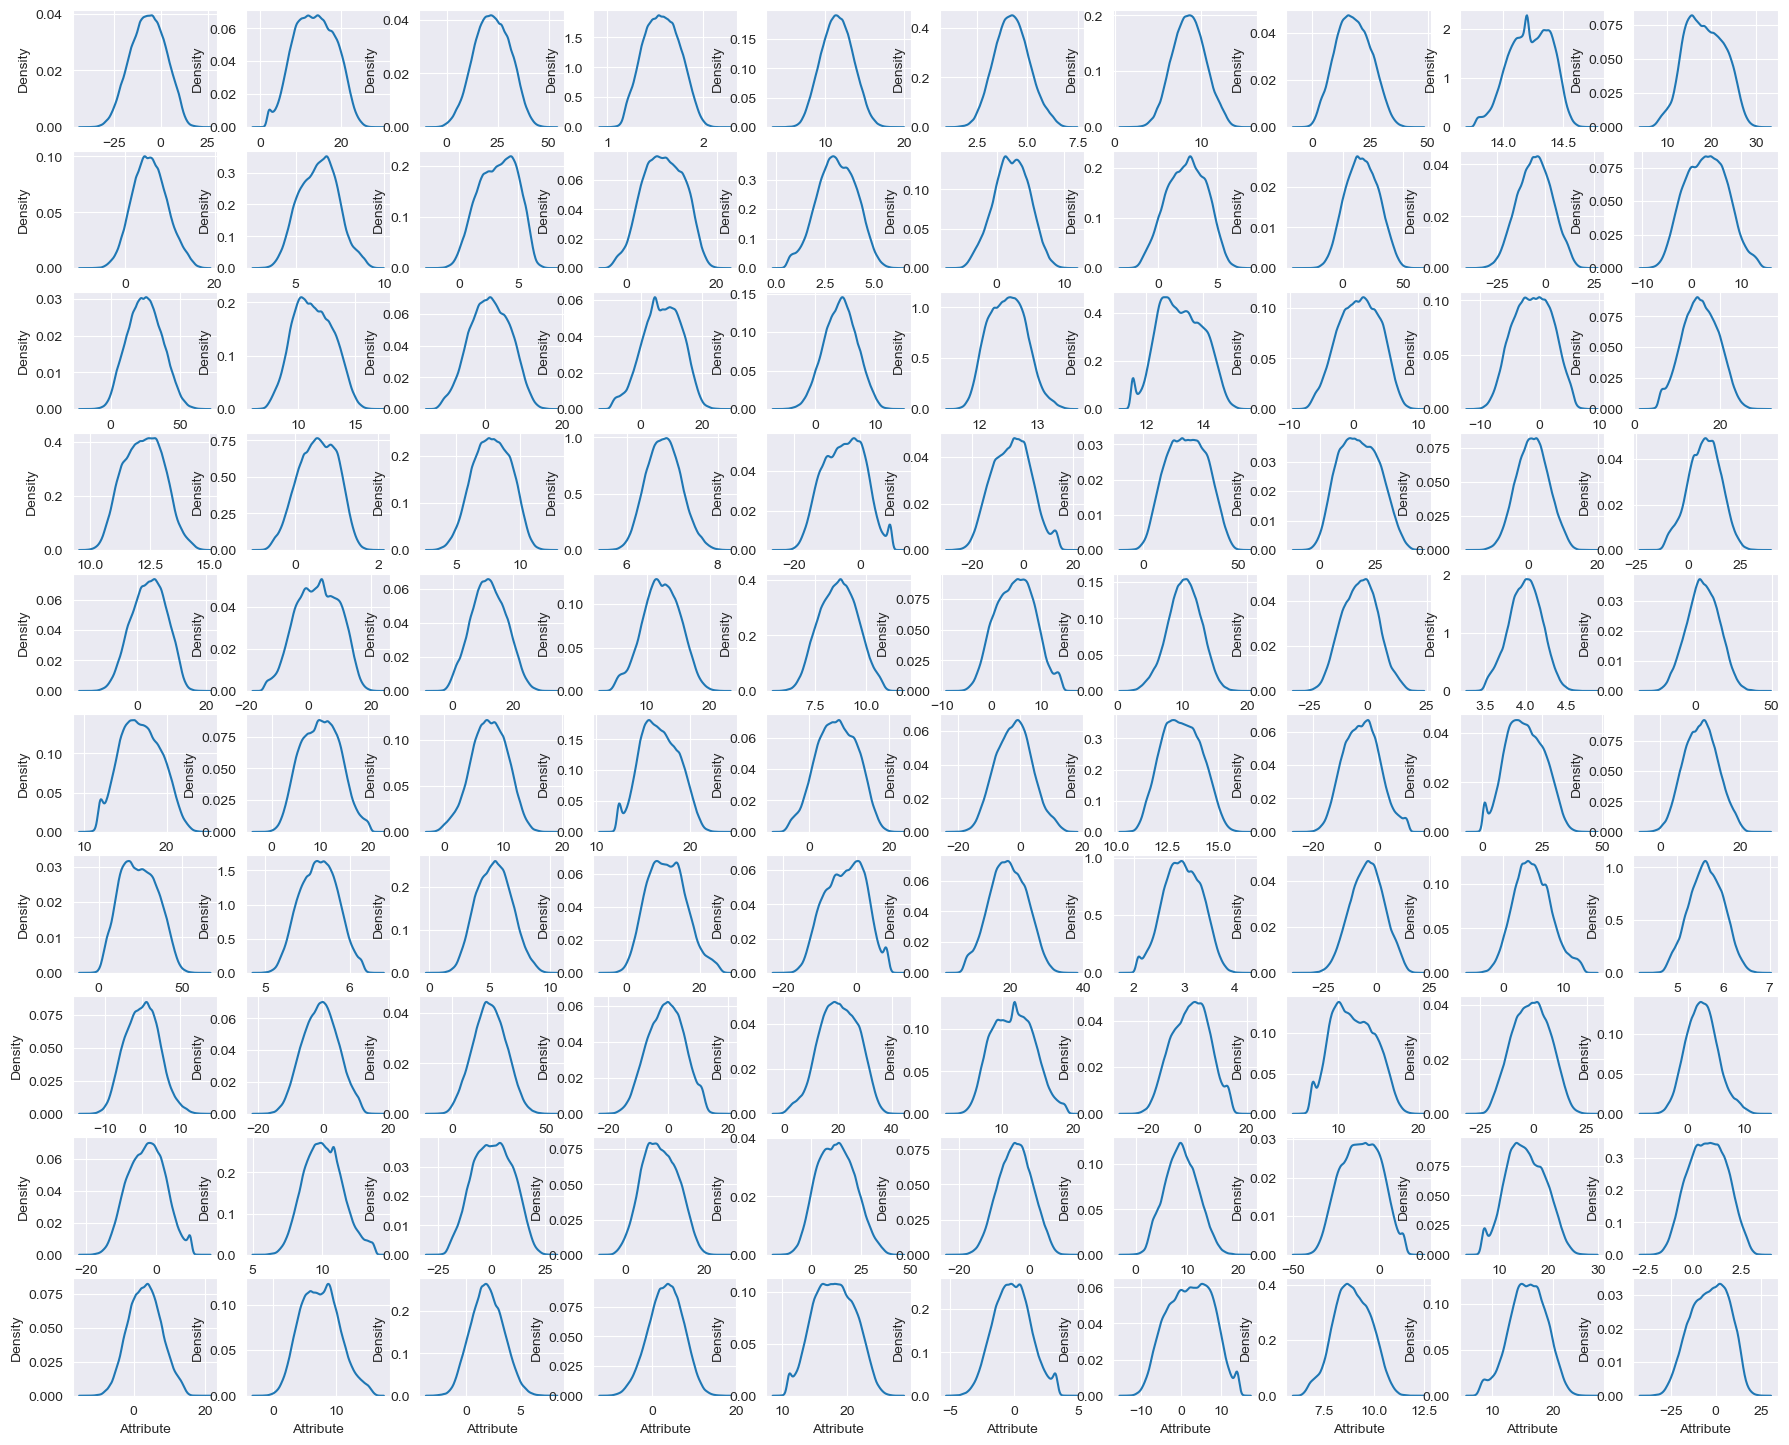

In [45]:
# train attributes from 2 to 102
test_attributes = df_test.columns.values[102:202]

# plot distribution of the train attribute
plot_test_attribute_distribution(train_attributes)

## Distribution of mean values per rows and columns

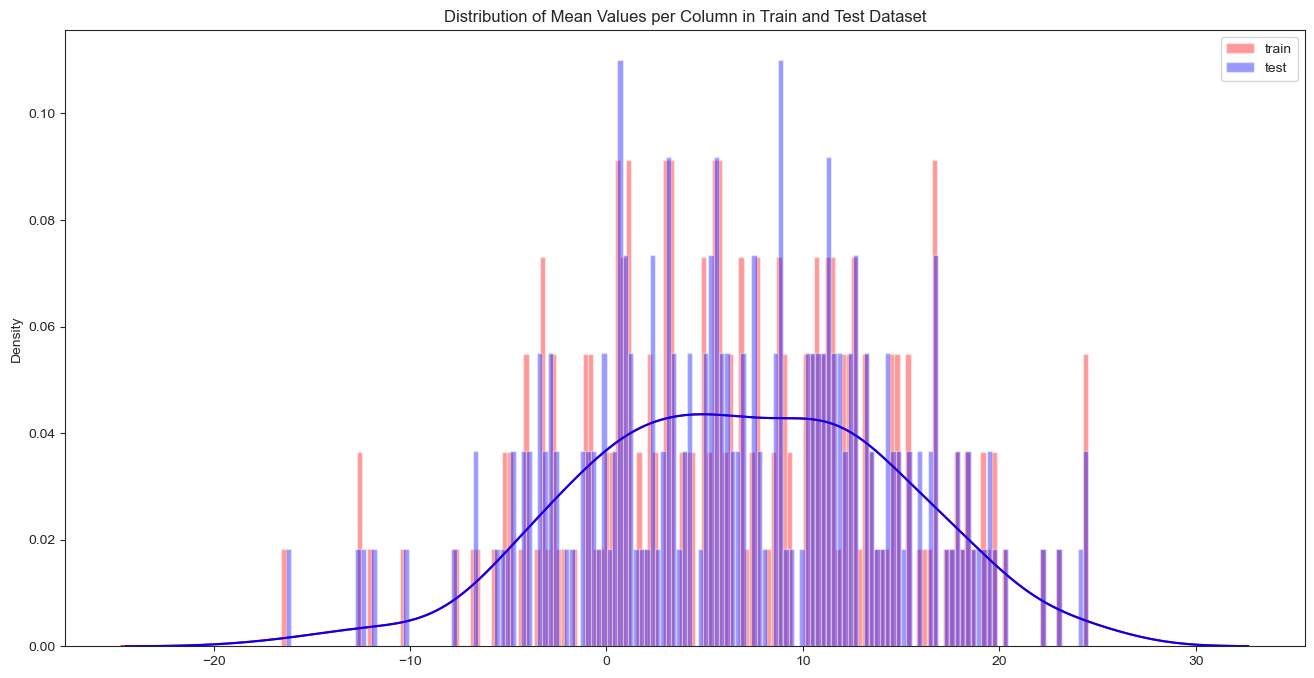

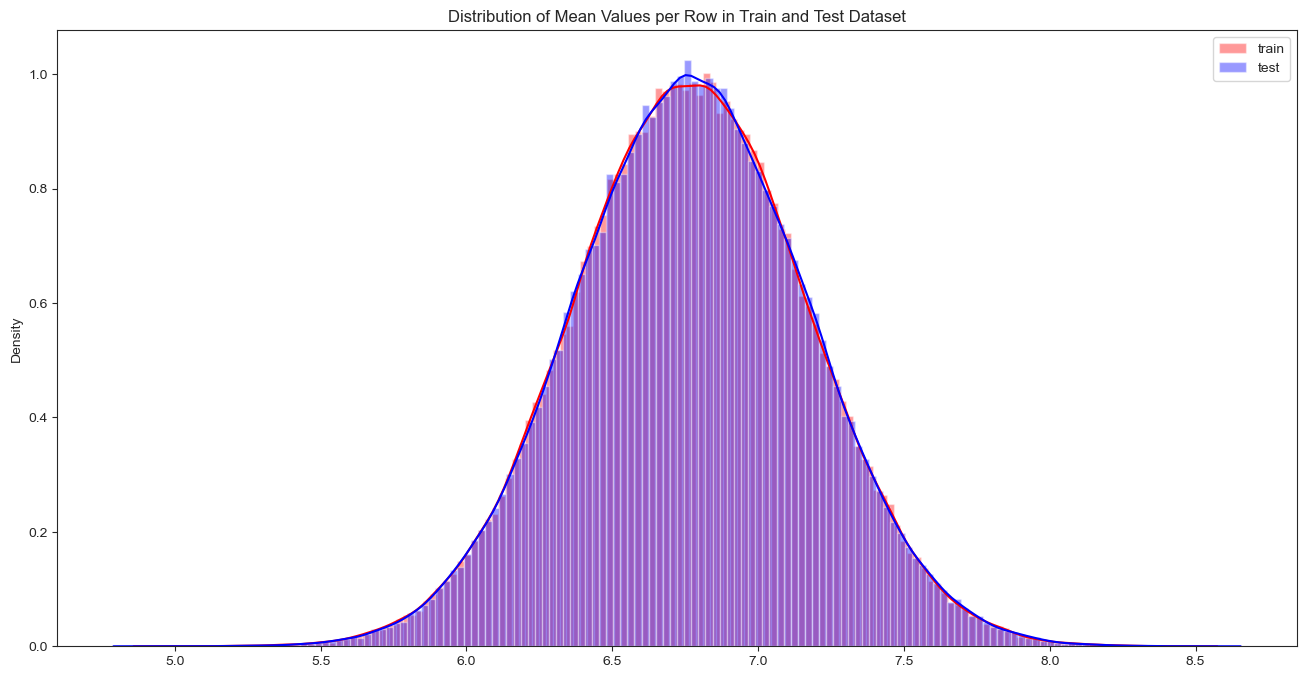

CPU times: total: 7.53 s
Wall time: 7.56 s


In [50]:
%%time
# Distribution of Mean Value per column in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# test attributes
test_attributes = df_test.columns.values[1:201]

# Distribution plot for mean values per column in train attributes
sns.distplot(df_train[train_attributes].mean(axis = 0), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for mean values per column in test attributes
sns.distplot(df_test[test_attributes].mean(axis = 0), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Mean Values per Column in Train and Test Dataset')
plt.legend()
plt.show()

# Distribution of Mean Values per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution plot for mean values per row in train attributes
sns.distplot(df_train[train_attributes].mean(axis = 1), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for mean values per row in test attributes
sns.distplot(df_test[test_attributes].mean(axis = 1), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Mean Values per Row in Train and Test Dataset')
plt.legend()
plt.show()

## Distribution of Standard Deviation Values per rows and columns

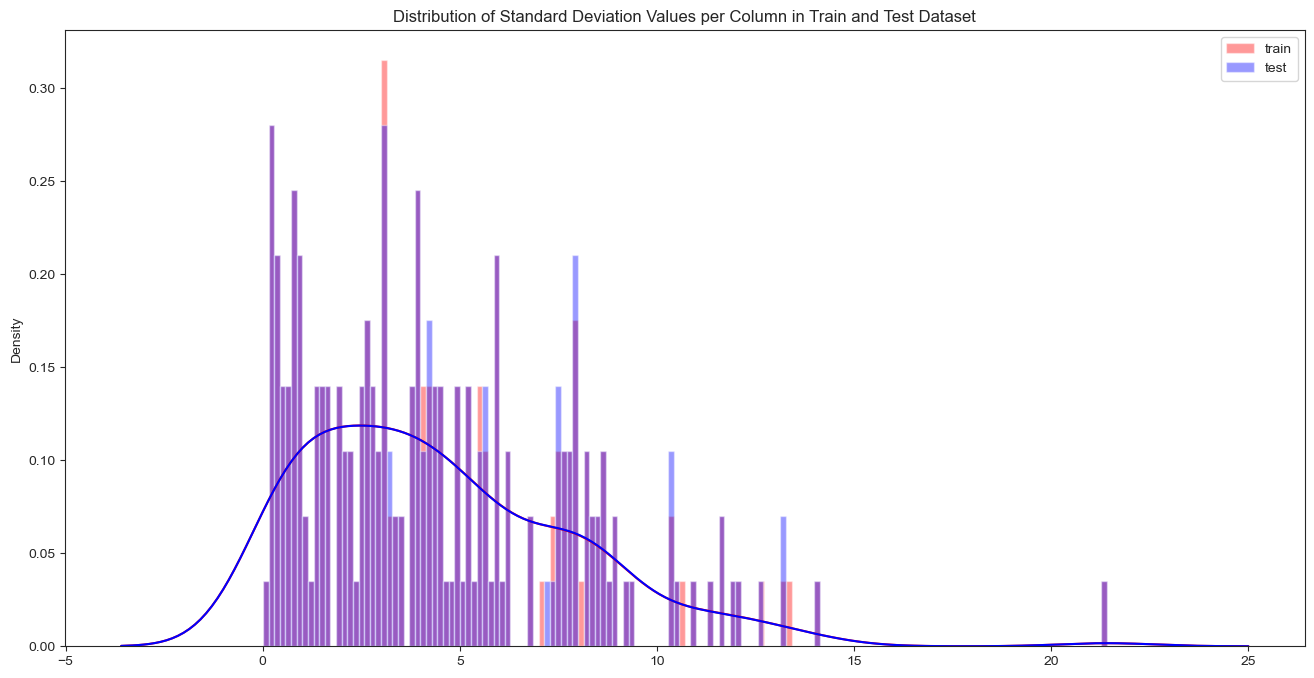

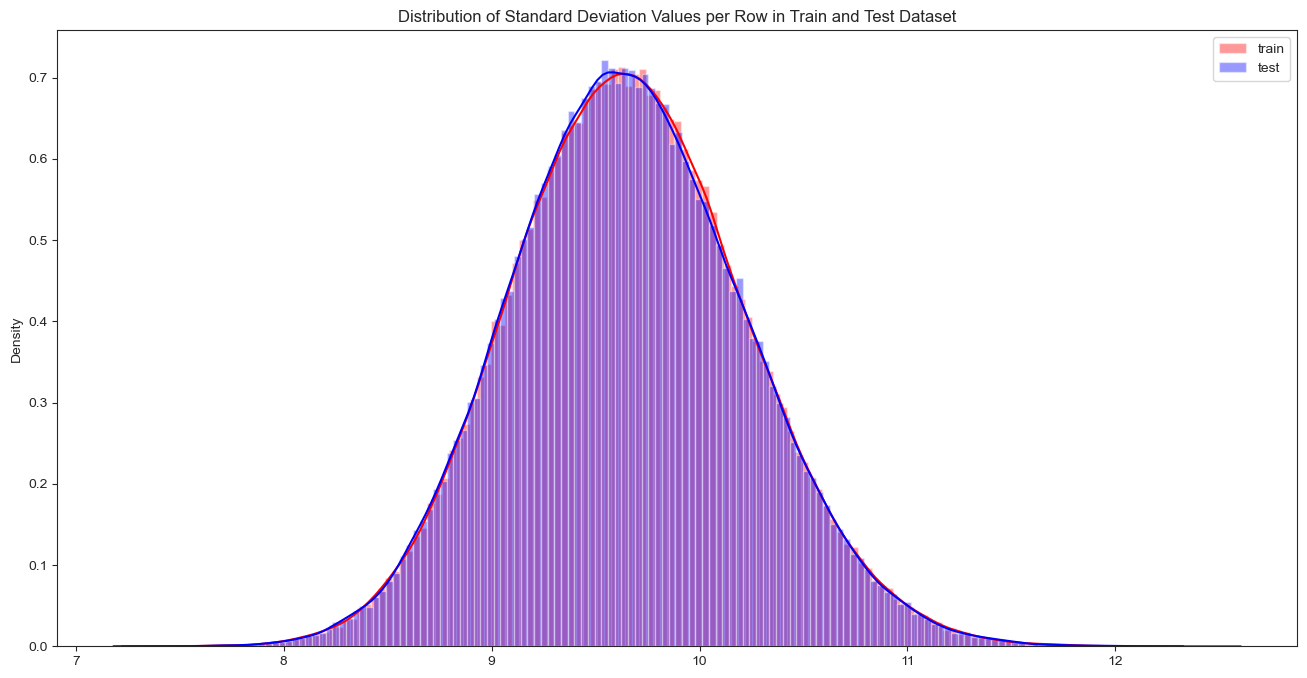

CPU times: total: 6.69 s
Wall time: 6.65 s


In [54]:
%%time
# Distribution of Standard Deviation per column in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# test attributes
test_attributes = df_test.columns.values[1:201]

# Distribution plot for S.D. values per column in train attributes
sns.distplot(df_train[train_attributes].std(axis = 0), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for S.D. values per column in test attributes
sns.distplot(df_test[test_attributes].std(axis = 0), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Standard Deviation Values per Column in Train and Test Dataset')
plt.legend()
plt.show()

# Distribution of S.D. Values per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution plot for S.D. values per row in train attributes
sns.distplot(df_train[train_attributes].std(axis = 1), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for S.D. values per row in test attributes
sns.distplot(df_test[test_attributes].std(axis = 1), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Standard Deviation Values per Row in Train and Test Dataset')
plt.legend()
plt.show()

## Dsitribution of Kurtosis Values per Rows and Columns

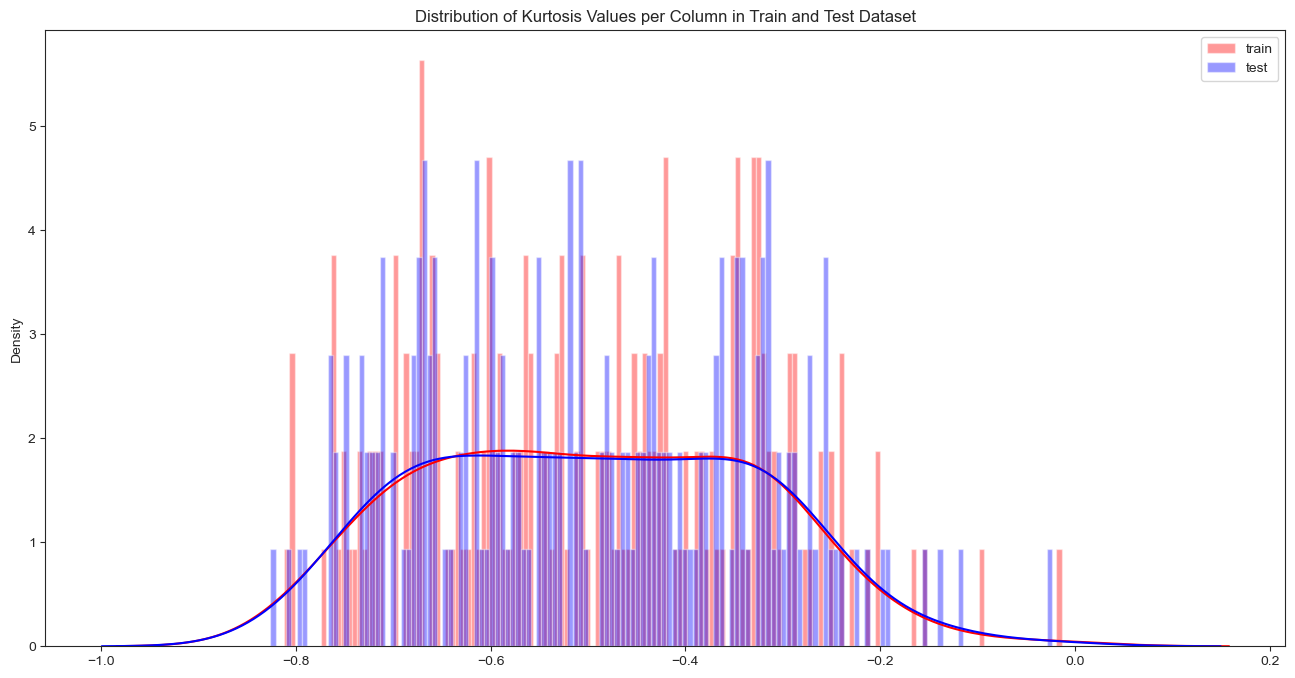

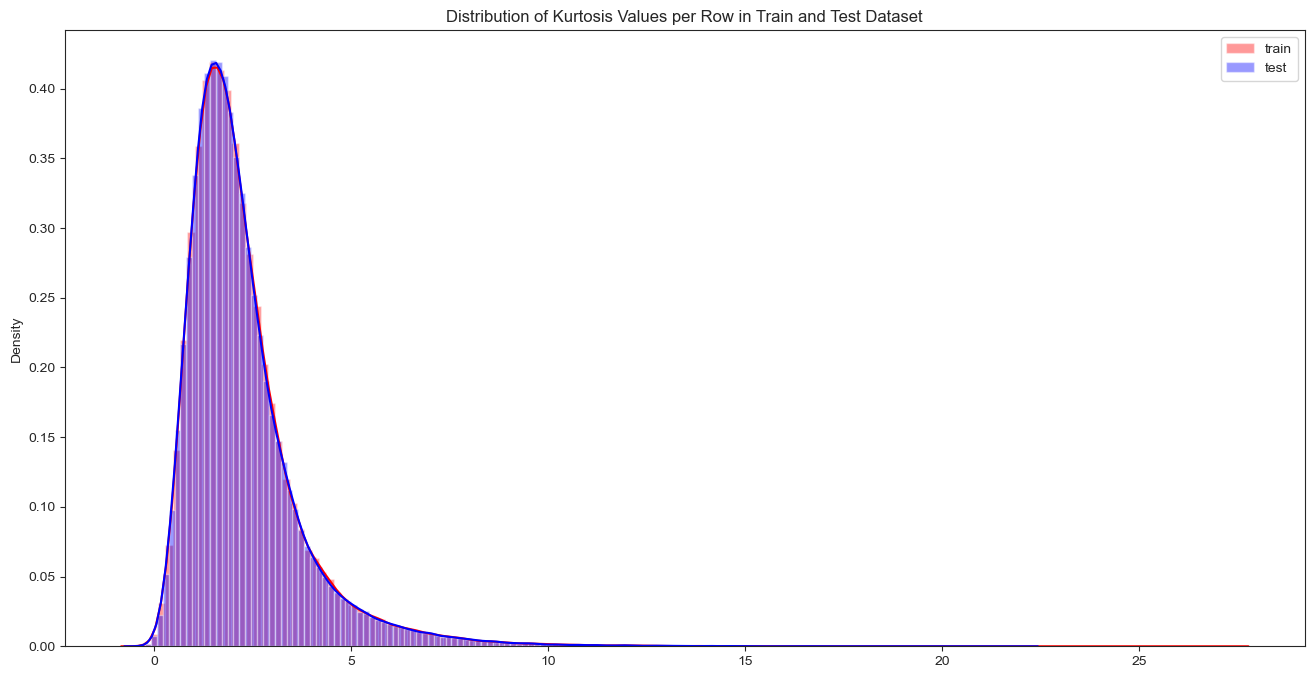

CPU times: total: 10.9 s
Wall time: 10.9 s


In [58]:
%%time
# Distribution of Kurtosis per column in train and test dataset
plt.figure(figsize=(16,8))

# train attributes
train_attributes = df_train.columns.values[2:202]

# test attributes
test_attributes = df_test.columns.values[1:201]

# Distribution plot for kurtosis values per column in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis = 0), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for kurtosis values per column in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis = 0), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Kurtosis Values per Column in Train and Test Dataset')
plt.legend()
plt.show()

# Distribution of kurtosis Values per row in train and test dataset
plt.figure(figsize=(16,8))

# Distribution plot for kurtosis values per row in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis = 1), color = 'red', kde = True, bins = 150, label = 'train')

# Distribution plot for kurtosis values per row in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis = 1), color = 'blue', kde = True, bins = 150, label = 'test')

plt.title('Distribution of Kurtosis Values per Row in Train and Test Dataset')
plt.legend()
plt.show()

## missing value analysis

In [62]:
%%time
# find the missing value in train and test dataset
train_missing = df_train.isnull().sum().sum()
test_missing = df_test.isnull().sum().sum()

print("MISSING VALUES IN TRAIN DATASET : ",train_missing)
print("MISSING VALUES IN TEST DATASET : ",test_missing)

MISSING VALUES IN TRAIN DATASET :  0
MISSING VALUES IN TEST DATASET :  0
CPU times: total: 266 ms
Wall time: 280 ms


Observation - No missing value is present in both train and test

## correlation between attributes

In [68]:
%%time
# correlation in train attribute
train_attributes  =df_train.columns.values[2:202]
train_correlation = df_train[train_attributes].corr().abs().unstack().sort_values(kind = 'quicksort').reset_index()
train_correlation = train_correlation[train_correlation['level_0'] != train_correlation['level_1']]
print(train_correlation.head(10))
print(train_correlation.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
CPU times: total: 28 s
Wall time: 28.1 s


In [69]:
%%time
# correlation in test attribute
test_attributes  =df_test.columns.values[2:202]
test_correlation = df_test[test_attributes].corr().abs().unstack().sort_values(kind = 'quicksort').reset_index()
test_correlation = test_correlation[test_correlation['level_0'] != test_correlation['level_1']]
print(test_correlation.head(10))
print(test_correlation.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_113  var_188  1.639749e-07
3  var_188  var_113  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39392  var_164  var_122  0.008513
39393  var_122  var_164  0.008513
39394    var_2  var_164  0.008614
39395  var_164    var_2  0.008614
39396  var_132   var_31  0.008714
39397   var_31  var_132  0.008714
39398  var_143   var_96  0.008829
39399   var_96  var_143  0.008829
39400  var_139   var_75  0.009868
39401   var_75  var_139  0.009868
CPU times: total: 26.6 s
Wall time: 26.8 s


obersvation - correlation amongst the train and the test attributes are very small

## correlation plot for train and test dataset

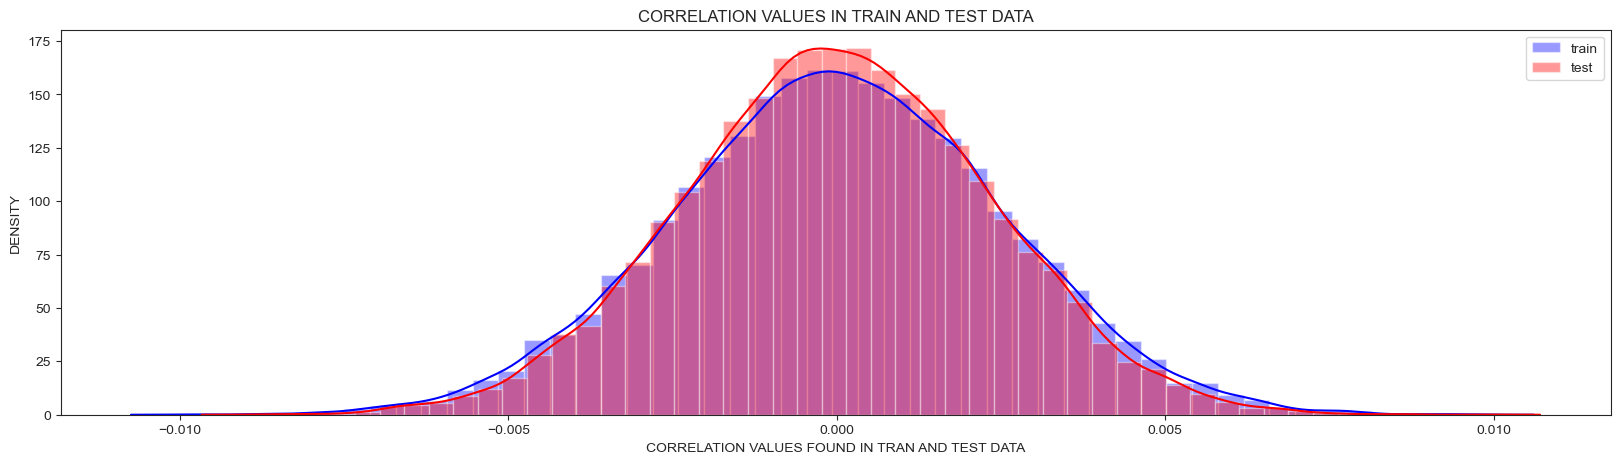

In [73]:
train_correlation = df_train[train_attributes].corr()
train_correlation = train_correlation.values.flatten()
train_correlation = train_correlation[train_correlation != 1]

test_correlation = df_test[test_attributes].corr()
test_correlation = test_correlation.values.flatten()
test_correlation = test_correlation[test_correlation != 1]

plt.figure(figsize = (20, 5))
sns.distplot(train_correlation, color = 'blue', label = 'train')
sns.distplot(test_correlation, color = 'red', label = 'test')
plt.xlabel("CORRELATION VALUES FOUND IN TRAN AND TEST DATA")
plt.ylabel("DENSITY")
plt.title("CORRELATION VALUES IN TRAIN AND TEST DATA")
plt.legend()

correlation values found in train and test data are very small, its completely visible from the graph

## Feature engineering - performing feature engineering by using permutations importance - partial dependence plot

In [104]:
# training and testing data
x = df_train.drop(columns = ['ID_code', 'target'], axis = 1)
test = df_test.drop(columns = ['ID_code'], axis = 1)
y = df_train['target']

In [106]:
# build a simple model to find the features which are more important

In [108]:
# split the train data
x_train, y_train, x_test, y_test = train_test_split(x, y, random_state = 42)

### random forest classifier

In [111]:
x_train = x_train[:len(y_train)]
print(x_train.shape)

(50000, 200)


In [113]:
print(y_train[:10])  # Inspect first 10 values
print(y_train.dtypes)  # Check the data type

          var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
119737  11.0038 -4.5026   9.0662   6.4313  10.7061 -15.2857  5.1233  16.7875   
72272   12.8473 -6.1848   6.8799   2.0164  12.7998  10.2781  4.4191  15.6940   
158154  13.1827 -0.8344  13.4689   3.9060  13.5984   4.6475  5.9659  24.0557   
65426    8.2132  1.2309  11.1464   9.4524  10.2142   4.0416  5.3989  20.4527   
30074    5.5681  4.6355  15.2350   3.0718  11.8178 -15.0502  3.8357  12.0169   
23677   10.9255 -1.9087  10.4506   8.4906  12.2991 -15.5323  4.2468  13.7538   
134858  11.4503  4.0273   8.9075   8.0067   9.4094   0.3297  5.6029  12.6545   
176418  11.8280 -2.4992  10.7057   8.6949  14.1530 -13.5919  5.4506  12.5229   
132467  12.9107 -2.8342   8.8888  11.0043   8.0937  -7.1183  4.8870  10.1669   
4082    10.1393 -1.1543   7.9994   4.8873  14.2020   0.1650  4.5320  16.0232   

         var_8   var_9  var_10   var_11   var_12   var_13   var_14   var_15  \
119737  4.1833  8.4055 -4.1540 -10.8329 

In [115]:
threshold = 0.5  # Example threshold value
y_train = (y_train > threshold).astype(int)  # Convert to binary classes (0 or 1)

In [117]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

# fitting the model
rf_model.fit(x_train, y_train)

CPU times: total: 31min 58s
Wall time: 32min 7s


RandomForestClassifier(n_estimators=10, random_state=42)

calculating weights and observing some important features via using eli5 library. eli5 is a python library which helps to debug machine learning classifiers and explain their predictions

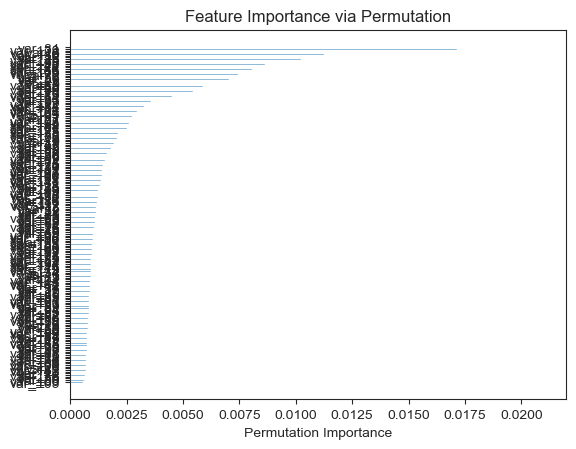

In [210]:
from sklearn.inspection import permutation_importance

# Train the model
rf_model.fit(x_train, y_train)

# Compute permutation importance
result = permutation_importance(rf_model, x_train, y_train, scoring='accuracy')

# Visualize results
sorted_idx = result.importances_mean.argsort()
plt.barh(range(x_train.shape[1]), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(x_train.shape[1]), [x_train.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance via Permutation')
plt.show()

*observation* - features having highest to lowest importance is in descending order as show in the prediction. Features show in green having highe positive impact on prediction and features having zero impact on the color.

*partial dependence plots* - pdp gives a graphical depiction marginal effect of a variable on a class probably or classification. it shows how a feature effects predictions

handling of imbalanced data - multiple approaches can be used for dealing with it.
1. change of performance matrix
2. oversample minority class
3. undersample majority class
4. SMOTE(synthetic minority oversampling techniques)
5. change of algorithm

### logistic regression model

In [134]:
# sppliting the data with stratified k fold cross validator
# traing data
X = df_train.drop(['ID_code', 'target'], axis = 1)
Y = df_train['target']

# stratified k fold cross validator
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
for train_index, valid_index in skf.split(X,Y):
    x_train, x_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]

print("SHAPE OF x_train : ",x_train.shape)
print("SHAPE OF x_valid : ",x_valid.shape)
print("SHAPE OF y_train : ",y_train.shape)
print("SHAPE OF y_valid : ",y_valid.shape)

SHAPE OF x_train :  (160000, 200)
SHAPE OF x_valid :  (40000, 200)
SHAPE OF y_train :  (160000,)
SHAPE OF y_valid :  (40000,)


In [136]:
%%time
lr_model = LogisticRegression(random_state = 42)
# fiiting the model
lr_model.fit(x_train, y_train)

CPU times: total: 24.3 s
Wall time: 5.43 s


LogisticRegression(random_state=42)

In [138]:
# Accuracy of the model
lr_score = lr_model.score(x_train, y_train)
print("ACCURACY OF THE lr_model : ", lr_score)

ACCURACY OF THE lr_model :  0.9122


In [140]:
%%time
# cross validation prediction of the lr_model
cv_predict = cross_val_predict(lr_model, x_valid, y_valid, cv = 5)
# cross validation score
cv_score = cross_val_score(lr_model, x_valid, y_valid, cv = 5)
print("CROSS VALIDATION SCORE : ", cv_score)

CROSS VALIDATION SCORE :  [0.910375 0.912625 0.9135   0.90525  0.91075 ]
CPU times: total: 47.4 s
Wall time: 13.4 s


In [142]:
unique, counts = np.unique(cv_predict, return_counts = True)
dict(zip(unique, counts))

{0: 38606, 1: 1394}

we wont be using accuracy as the performance metric because we cant apply it on an imbalanced dataset

### confusion matrix

In [146]:
cm = confusion_matrix(y_valid, cv_predict)
cm = pd.crosstab(y_valid, cv_predict)
cm

col_0,0,1
target,,
0,35503,477
1,3103,917


obersvation - on comparing roc_auc_score and model accuracy, model is not perfoming on the imbalanced data

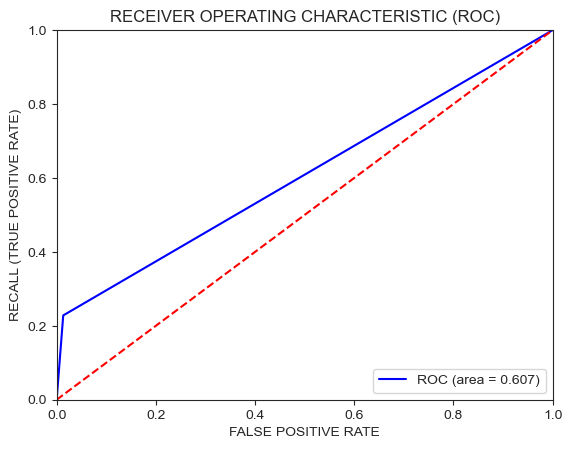

AUC : 0.6074260437667139


In [149]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, cv_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure()
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='ROC (area = %0.3f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')  # Dashed diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('RECALL (TRUE POSITIVE RATE)')
plt.xlabel('FALSE POSITIVE RATE')
plt.show()

# Print AUC
print('AUC :', roc_auc)

In [151]:
# classification report
classification_scores = classification_report(y_valid, cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.66      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



obervation - as we see that f1 score is high for the customer who will not make a transaction compare to those who will make a transaction, so we are going to change the algorithm.

In [162]:
# Correct syntax for dropping a column
x_test = df_test.drop('ID_code', axis=1)

# Predict on the test dataset
lr_pred = lr_model.predict(x_test)

# Print predictions
print(lr_pred)

[0 0 0 ... 0 0 0]


In [164]:
# type markdown and latex a2

oversample minority class
Oversample Minority Class

- Adding more copies of minority class

It can be a good option we don't have that much large data to work

- Drawback of this process is that we are adding information which may lead to overfitting or poor performance on test data.

Undersample Majority Class

- Removing some copies of majority class

- It can be a very good option if we have very large amount of data say in millions to work.

Drawback of this process is we are removing some valuable information, this can lead to underfitting and poor perfromance on test data.

As per the drawbacks of both the model we will use SMOTE (Synthetic Minority Oversampling Technique) that is more better than above.

SMOTE (Synthetic Minority Oversampling Technique) - This is a statistical technique for increasing the number of cases in your dataset in a b

uses a nearest neighbours algorithm to generate new and synthetic data to use for training the model

In [169]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0)

# Generating synthetic datapoints for training and validation sets
x_smote, y_smote = sm.fit_resample(x_train, y_train)
x_smote_v, y_smote_v = sm.fit_resample(x_valid, y_valid)

print("Shape of x_smote:", x_smote.shape)
print("Shape of y_smote:", y_smote.shape)
print("Shape of x_smote_v:", x_smote_v.shape)
print("Shape of y_smote_v:", y_smote_v.shape)

Shape of x_smote: (287844, 200)
Shape of y_smote: (287844,)
Shape of x_smote_v: (71960, 200)
Shape of y_smote_v: (71960,)


 ### building logistic regression model on synthetic datapoinhts 

In [172]:
%%time
# logistic regression model for SMOTE
smote = LogisticRegression(random_state = 42)
# fitting the smote model
smote.fit(x_smote, y_smote)

CPU times: total: 48.3 s
Wall time: 9.62 s


LogisticRegression(random_state=42)

In [174]:
LogisticRegression(random_state = 42)

LogisticRegression(random_state=42)

In [176]:
# accuracy of the model
smote_score = smote.score(x_smote,y_smote)
print("ACCURACY OF THE SMOTE_MODEL : ", smote_score)

ACCURACY OF THE SMOTE_MODEL :  0.788371478995567


In [178]:
%%time
# cross validation prediction for smote
cv_pred = cross_val_predict(smote, x_smote_v, y_smote_v, cv = 5)
# cross validation score
cv_score = cross_val_score(smote, x_smote_v, y_smote_v, cv = 5)
print("CROSS VALIDATION SCORE : ", cv_score)

CROSS VALIDATION SCORE :  [0.7815453  0.80503057 0.80259867 0.79294052 0.80093107]
CPU times: total: 1min 25s
Wall time: 22.6 s


In [179]:
%%time
# confusion matrix
cm = confusion_matrix(y_smote_v, cv_pred)
cm = pd.crosstab(y_smote_v, cv_pred)
cm

CPU times: total: 46.9 ms
Wall time: 39 ms


col_0,0,1
target,,
0,28220,7760
1,6876,29104


In [180]:
# roc auc score
roc_score = roc_auc_score(y_smote_v, cv_pred)
print("ROC SCORE : ", roc_score)

ROC SCORE :  0.796609227348527


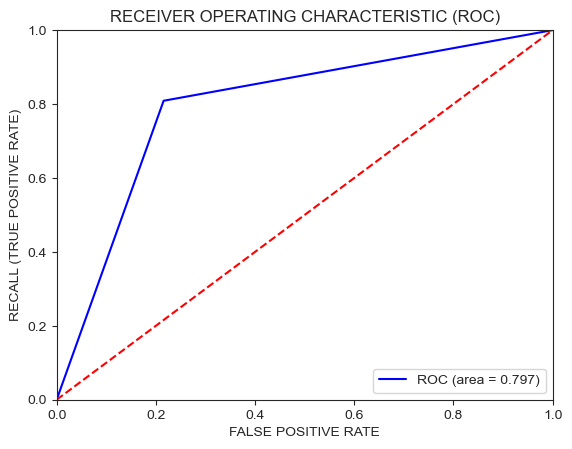

AUC: 0.796609227348527


In [184]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure `cv_pred` contains predicted probabilities
# cv_pred_prob = model.predict_proba(x_smote_v)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_smote_v, cv_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure()
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='ROC (area = %0.3f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')  # Dashed diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('RECALL (TRUE POSITIVE RATE)')
plt.xlabel('FALSE POSITIVE RATE')
plt.show()

# Print AUC
print('AUC:', roc_auc)

### classification report

In [194]:
scores = classification_report(y_smote_v, cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



 we can observe that theb f1 score is high for the customer who didnt make the transaction as well as the customer who made the transaction

## model performance on the test data

In [191]:
%%time
# predicting the model
x_test = df_test.drop(['ID_code'], axis = 1)
smote_pred = smote.predict(x_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
CPU times: total: 312 ms
Wall time: 303 ms


 observation - we can observe that smote model is performing better than simple logistic regression

 light GBM - it is a gradient boosting framework that uses the time based algorithm

In [197]:
# trainging data
lgb_train = lgb.Dataset(x_train, label = y_train)
# validatng data
lgb_valid = lgb.Dataset(x_valid, label = y_valid)

In [199]:
# selecting the hyperparameter by tuning of differnet parameters
params = {
    'boosting_type' : 'gbdt',
    'max_depth' : -1,
    'objective' : 'binary',
    'boost_from_average' : False,
    'nthread' : 20,
    'metric' : 'auc',
    'num_leaves' : 50,
    'learning_rate' : 0.01,
    'max_bin' : 100,
    'subsample for bin' : 100,
    'subsample' : 1,
    'subsample_freq' : 1,
    'colsample_bytree' : 0.8,
    'bagging_fraction' : 0.5,
    'bagging_freq' : 5,
    'feature_fraction' : 0.08,
    'min_split_gain' : 0.45,
    'min_child_weight' : 1,
    'min_child_samples' : 5,
    'is_unbalanced' : True,
}

In [201]:
import lightgbm as lgb

# Prepare the datasets
lgb_train = lgb.Dataset(x_train, y_train)
lgb_valid = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# Define LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'seed': 42
}

# Train the model with early stopping
num_rounds = 10000
lgbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=num_rounds,
    valid_sets=[lgb_train, lgb_valid],  # Specify training and validation datasets
    callbacks=[
        lgb.early_stopping(stopping_rounds=5000),  # Early stopping
        lgb.log_evaluation(period=1000)  # Log evaluation metrics every 1000 rounds
    ]
)

# Print the model
print(lgbm)

[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.151559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100487 -> initscore=-2.191820
[LightGBM] [Info] Start training from score -2.191820
Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.990864	valid_1's auc: 0.893321
[2000]	training's auc: 0.999652	valid_1's auc: 0.893159
[3000]	training's auc: 0.999998	valid_1's auc: 0.891998
[4000]	training's auc: 1	valid_1's auc: 0.891377
[5000]	training's auc: 1	valid_1's auc: 0.890773
[6000]	training's auc: 1	valid_1's auc: 0.890243
Early stopping, best iteration is:
[1423]	training's auc: 0.997448	valid_1's auc: 0.893401


In [202]:
x_test = df_test.drop(['ID_code'], axis = 1)
# predict the model
# #probability predictions
# Predict without specifying iterations
lgbm_predict_prob = lgbm.predict(x_test)

# Convert probabilities to binary predictions
lgbm_predict = np.where(lgbm_predict_prob > 0.5, 1, 0)

print(lgbm_predict_prob)
print(lgbm_predict)

[0.04168542 0.29879807 0.20368402 ... 0.00439339 0.06857097 0.04900683]
[0 0 0 ... 0 0 0]


## plotting the importance of features

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

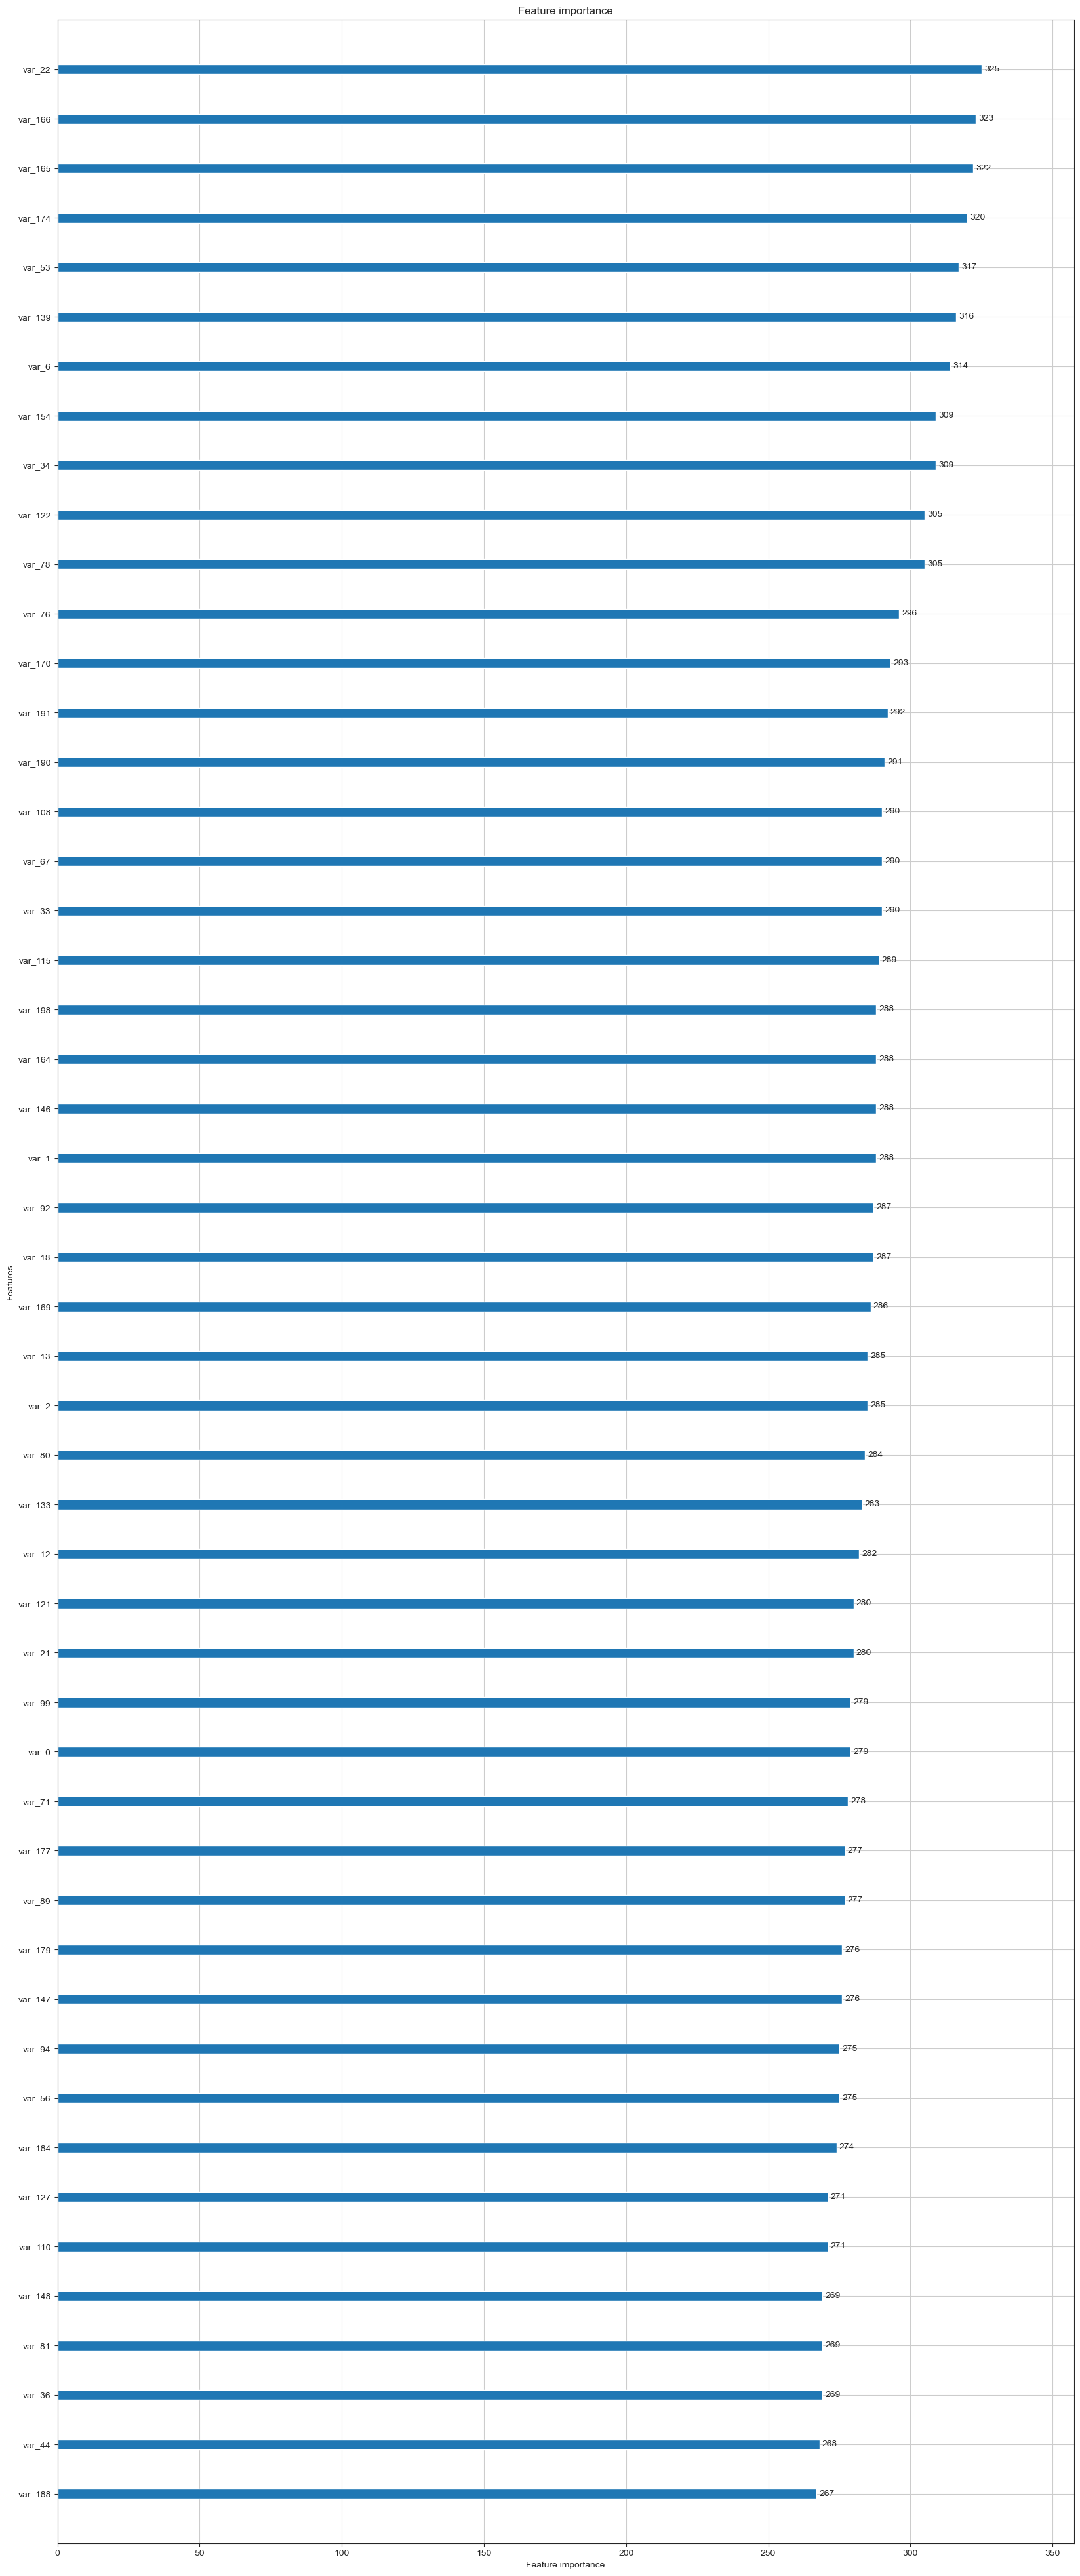

In [204]:
lgb.plot_importance(lgbm, max_num_features = 50, importance_type = "split", figsize = (20,50))

In [205]:
# final submission
df_sub = pd.DataFrame({'ID_code' : df_test['ID_code'].values})
df_sub['lgbm_predict_prob'] = lgbm_predict_prob
df_sub['lgbm_predict'] = lgbm_predict
df_sub.to_csv('SUBMISSION.csv', index = False)
df_sub.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.041685,0
1,test_1,0.298798,0
2,test_2,0.203684,0
3,test_3,0.142499,0
4,test_4,0.039471,0
